In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [21]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 50
lamda_0_hailing = 4#2 RMB/minute
lamda_0_PR = 30 # RMB
lamda_0_transit = 5
N_hailing = 2000
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

df = []
first_mile = np.arange(0.5, 25.2, 1) 
for distance in first_mile:
    my_link.l_a[my_link.attribute == 'board_transit'] = distance
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# system cost
total_cost = []
for item in df:
    flow_set = item[2].tail(item[6])
    cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
    total_cost.append(cost)

# OD cost
def od_cost(path, od):
    cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow']) / sum(path[path['OD_pair'] == od]['path_flow'])
    return cost

od_1_cost = []
od_2_cost = []
od_3_cost = []
od_4_cost = []
for i in range(len(df)):
    flow_set = df[i][2].tail(df[i][6])
    od_1_cost.append(od_cost(flow_set, 'r1-s1'))
    od_2_cost.append(od_cost(flow_set, 'r1-s2'))
    od_3_cost.append(od_cost(flow_set, 'r2-s1'))
    od_4_cost.append(od_cost(flow_set, 'r2-s2'))

# mode share
PR_logit = [df[i][4].tail(df[i][7]).iloc[0]['mode_logit'] for i in range(len(df))]
RT_logit = [df[i][4].tail(df[i][7]).iloc[1]['mode_logit'] for i in range(len(df))]
auto_logit = [df[i][4].tail(df[i][7]).iloc[2]['mode_logit'] for i in range(len(df))]
bus_logit = [df[i][4].tail(df[i][7]).iloc[3]['mode_logit'] for i in range(len(df))]

# ride-hailing vehicle number
n_idle = [df[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(df))]
waiting_hailing = [df[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'distance': first_mile,
        'n_idle': n_idle,
        'waiting time': waiting_hailing,
        'od_1_cost': od_1_cost,
        'od_2_cost': od_2_cost,
        'od_3_cost': od_3_cost,
        'od_4_cost': od_4_cost,
        'total_cost': total_cost,
        'auto_logit': auto_logit,
        'bus_logit': bus_logit,
        'PR_logit': PR_logit,
        'RT_logit': RT_logit,})

  OD_pair  demand
0   r1-s1    2000
1   r1-s2    1500
2   r2-s1    1200
3   r2-s2    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', 'auto', 'auto', 'auto', 'auto

In [22]:
dfx

,distance,n_idle,waiting time,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit
0,0.5,1809.532396,16.258423,185.668581,167.208349,153.718873,153.368074,239447.375998,0.337155,0.238535,0.195391,0.228919
1,1.5,1808.246140,16.263421,187.581616,170.342542,156.401389,156.631960,243155.334991,0.339376,0.233189,0.196742,0.230692
2,2.5,1806.811752,16.269000,189.463999,173.413004,159.027535,159.828755,246795.661959,0.341493,0.228076,0.198035,0.232396
3,3.5,1805.436910,16.274353,191.265865,176.366003,161.539406,162.901272,250283.879104,0.343513,0.223189,0.199270,0.234028
4,4.5,1804.123566,16.279472,192.991087,179.206317,163.942909,165.855088,253627.162950,0.345439,0.218525,0.200449,0.235587
5,5.5,1802.868905,16.284367,194.644211,181.940080,166.245066,168.697104,256834.166325,0.347272,0.214081,0.201571,0.237076
6,6.5,1801.674651,16.289031,196.229069,184.572250,168.451714,171.433046,259912.093402,0.349014,0.209854,0.202638,0.238494
7,7.5,1800.538809,16.293471,197.749925,187.108707,170.569385,174.069510,262869.097130,0.350667,0.205840,0.203651,0.239842
8,8.5,1799.458922,16.297695,199.210922,189.555261,172.604378,176.612958,265713.113875,0.352232,0.202034,0.204611,0.241123
9,9.5,1798.436659,16.301697,200.615749,191.916936,174.562278,179.069132,268451.175812,0.353713,0.198431,0.205519,0.242336


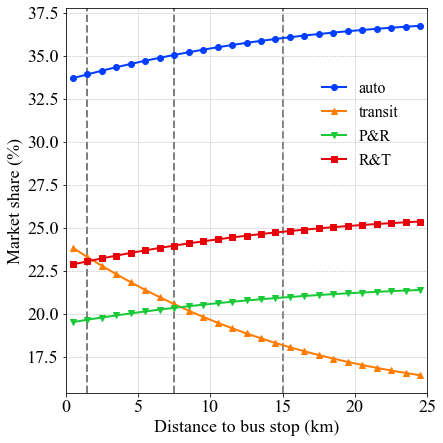

In [54]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(6.5,6.5))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(1,1,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['distance'], dfx['auto_logit']*100, '-', lw=2, marker=markers[0], label='auto')
ax.plot(dfx['distance'], dfx['bus_logit']*100, '-', lw=2, marker=markers[1], label='transit')
ax.plot(dfx['distance'], dfx['PR_logit']*100, '-', lw=2, marker=markers[2], label='P&R')
ax.plot(dfx['distance'], dfx['RT_logit']*100, '-', lw=2, marker=markers[3], label='R&T')
ax.set_xlabel('Distance to bus stop (km)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor=(0.96,0.85)) #, 
ax.set_xlim(0, 25)
ax.axvline(x=1.5, lw=2, ls='--',c='black', alpha=0.5,zorder=0)
ax.axvline(x=7.5, lw=2, ls='--',c='black', alpha=0.5,zorder=0)
ax.axvline(x=15, lw=2, ls='--',c='black', alpha=0.5,zorder=0)
#ax.set_title('(b) Market share of different modes', fontsize=18, loc='center', y=1.02,)

plt.tight_layout()
plt.show()

In [59]:
(dfx.head(1).values - dfx.tail(1).values) *100

array([[-2.40000000e+03,  2.08072306e+03, -8.14501829e+00,
        -3.15803853e+03, -5.33312004e+03, -4.43619619e+03,
        -5.57568058e+03, -6.17864878e+06, -3.04479216e+00,
         7.40488618e+00, -1.86726655e+00, -2.49282748e+00]])